In [1]:
import statsmodels.api as sm
import pandas as pd
from datetime import datetime
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import sqlite3


In [2]:
end_date = datetime.today()
start_date = end_date - timedelta(days=3650)
tickers = ['SPY','BABA', 'AAPL','LLY', 'GIS', 'XOM']
df = yf.download( tickers,
    start=start_date,
    end = end_date
)

[*********************100%***********************]  6 of 6 completed


In [3]:
df.tail()


Adj Close                                                \
                  AAPL       BABA        GIS         LLY         SPY   
Date                                                                   
2023-03-03  151.029999  89.699997  79.599998  318.429993  404.190002   
2023-03-06  153.830002  89.620003  79.110001  318.959991  404.470001   
2023-03-07  151.600006  88.730003  79.040001  310.630005  398.269989   
2023-03-08  152.869995  86.949997  79.169998  312.540009  398.920013   
2023-03-09  150.589996  83.370003  78.639999  316.850006  391.559998   

                             Close                                    ...  \
                   XOM        AAPL       BABA        GIS         LLY  ...   
Date                                                                  ...   
2023-03-03  112.809998  151.029999  89.699997  79.599998  318.429993  ...   
2023-03-06  113.809998  153.830002  89.620003  79.110001  318.959991  ...   
2023-03-07  111.610001  151.600006  88.730003  79.040001  310.630005  ...   
2023-03-08  109.980003  152.869995  86.949997  79.169998  312.540009  ...   
2023-03-09  109.129997  150.589996  83.370003  78.639999  316.850006  ...   

                 Open                                        Volume  \
                  GIS         LLY         SPY         XOM      AAPL   
Date                                                                  
2023-03-03  78.510002  316.369995  399.709991  110.050003  70668500   
2023-03-06  79.410004  316.940002  405.049988  111.989998  87558000   
2023-03-07  79.209999  319.000000  404.420013  112.809998  56182000   
2023-03-08  79.360001  310.500000  398.390015  111.230003  47204800   
2023-03-09  79.620003  312.309998  399.739990  110.870003  53755100   

                                                               
                  BABA      GIS      LLY        SPY       XOM  
Date                                                           
2023-03-03  25767000.0  2540000  3002800   90038300  12999400  
2023-03-06  16983900.0  2676900  2673700   72795900  14347400  
2023-03-07  14514700.0  2287800  2620800  108310600  11525300  
2023-03-08  14721500.0  2017000  2313200   74746600  13509800  
2023-03-09  24249000.0  2251300  3919800  111556600  12945600  

[5 rows x 36 columns]

## Create a new database 

In [4]:
# create a sql connection
con = sqlite3.connect('../datas/db/stock.db')
c = con.cursor()

# create price table
query1 = """CREATE TABLE IF NOT EXISTS prices (
Date TEXT NOT NULL,
ticker TEXT NOT NULL,
price REAL,
PRIMARY KEY(Date, ticker)
)"""

c.execute(query1.replace('\n',' '))

# create volume table
query2 = """CREATE TABLE IF NOT EXISTS volume (
Date TEXT NOT NULL,
ticker TEXT NOT NULL,
volume REAL,
PRIMARY KEY(Date, ticker)
)"""
c.execute(query2.replace('\n',' '))

# Select columns

In [5]:
adj_close = df['Adj Close']
volume = df['Volume']


In [6]:
# convert wide to long
adj_close_long = pd.melt(adj_close.reset_index(), id_vars='Date', value_vars=tickers, var_name ="ticker", value_name="price")
volume_long = pd.melt(volume.reset_index(), id_vars='Date', value_vars=tickers, var_name = "ticker", value_name = "volume")

## Push financial data into the database

In [8]:
adj_close_long.to_sql('prices', con, if_exists='append', index=False)
volume_long.to_sql('volume', con, if_exists='append', index=False)

ValueError: Table 'prices' already exists.

In [ ]:
adj_close.columns

Index(['AAPL', 'BABA', 'GIS', 'LLY', 'SPY', 'XOM'], dtype='object')

Text(0.5, 0, 'Date')

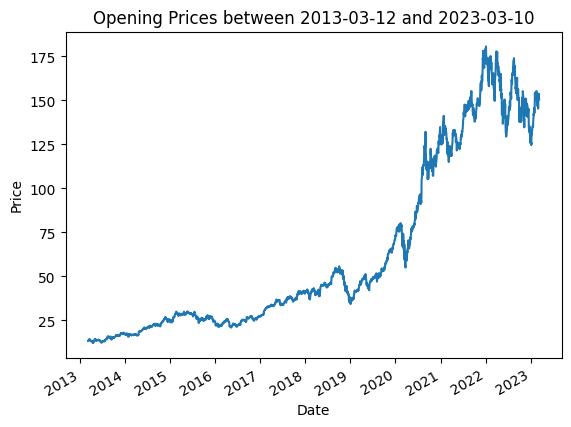

In [ ]:
import matplotlib.pyplot as plt
plt.title('Opening Prices between {} and {}'.format(
    start_date.date().isoformat(),
    end_date.date().isoformat()
))
adj_close['AAPL'].plot()
plt.ylabel('Price')
plt.xlabel('Date')

In [ ]:
filename = './datas/apple.csv'
stock  = adj_close['AAPL'].to_csv(filename, index_label=False)

OSError: Cannot save file into a non-existent directory: 'datas'